# Goals
- Determine the most valuable subscribers
- Understand subscriber segments
- What subscribers could be sold additional products/services
- Find the subscriber profile of those not continuing with the product
- Find out how to deepen subscriber engagement
- Identify any other opportunities that arise from analysis
## Questions
- Should we standardize purchase ammount, or recalculate based on the date data
- Due to some columns >50% null, should we do use some sampling techniques 
- Are the ids guaranteed to be unique  
From Matthew Tonks to Everyone:  12:52 PM
tonks@chapman.edu
From Jake Flath to Everyone:  12:52 PM
flath@chapman.edu
From Me to Everyone:  12:52 PM
jgonzalez@chapman.edu
From Chris Tsirtsis to Everyone:  12:52 PM
tsirtsis@chapman.edu
From Dillon Keefe to Everyone:  01:04 PM
dkeefe@chapman.edu


In [91]:
import pandas as pd
import numpy as np
from plotnine import *

### Subscriber Data

In [92]:
subscriber = pd.read_csv("data/subscriber.csv")
subscriber.head()

,ID,Language,Subscription Type,Subscription Event Type,Purchase Store,Purchase Amount,Currency,Subscription Start Date,Subscription Expiration,Demo User,...,Country,User Type,Lead Platform,Email Subscriber,Push Notifications,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count
0,1,POR,Limited,INITIAL_PURCHASE,App,NaN,NaN,12/28/2018,6/28/2019,Yes,...,US/Canada,Consumer,App,Yes,Yes,63.0,7.0,0.0,6.0,0.0
1,2,EBR,Limited,INITIAL_PURCHASE,Web,39.0,USD,11/28/2019,2/28/2020,No,...,Other,Consumer,Web,No,Yes,4.0,3.0,0.0,1.0,0.0
2,3,ESP,Limited,INITIAL_PURCHASE,Web,0.0,USD,12/31/2018,12/31/2019,No,...,US/Canada,Consumer,Web,Yes,Yes,1.0,0.0,0.0,0.0,0.0
3,4,KOR,Limited,INITIAL_PURCHASE,App,NaN,NaN,11/7/2019,2/7/2020,Yes,...,US/Canada,Consumer,App,Yes,Yes,14.0,0.0,0.0,0.0,0.0
4,5,ENG,Limited,INITIAL_PURCHASE,App,NaN,NaN,8/13/2019,11/13/2019,No,...,US/Canada,Consumer,Web,Yes,Yes,80.0,5.0,1.0,5.0,1.0


In [93]:
subscriber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40102 entries, 0 to 40101
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       40102 non-null  int64  
 1   Language                 40102 non-null  object 
 2   Subscription Type        40102 non-null  object 
 3   Subscription Event Type  40102 non-null  object 
 4   Purchase Store           40102 non-null  object 
 5   Purchase Amount          26923 non-null  float64
 6   Currency                 26924 non-null  object 
 7   Subscription Start Date  40102 non-null  object 
 8   Subscription Expiration  40102 non-null  object 
 9   Demo User                40102 non-null  object 
 10  Free Trial User          40102 non-null  object 
 11  Free Trial Start Date    5833 non-null   object 
 12  Free Trial Expiration    5833 non-null   object 
 13  Auto Renew               40101 non-null  object 
 14  Country               

In [94]:
subscriber.describe()

,ID,Purchase Amount,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count
count,40102.000000,2.692300e+04,28448.000000,28448.000000,28448.000000,28448.000000,28448.000000
mean,19980.310982,3.270582e+08,32.389307,8.233971,2.154246,3.892435,0.362943
std,11550.985627,1.681253e+10,58.436061,37.385582,29.366507,13.137642,1.132356
min,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9970.250000,0.000000e+00,4.000000,0.000000,0.000000,0.000000,0.000000
50%,19972.500000,3.881000e+01,10.000000,1.000000,0.000000,1.000000,0.000000
75%,29983.750000,1.523900e+02,33.000000,5.000000,0.000000,2.000000,0.000000
max,40000.000000,1.600000e+12,4370.000000,4365.000000,4348.000000,196.000000,44.000000


In [95]:
subscriber.isna().sum()

ID                             0
Language                       0
Subscription Type              0
Subscription Event Type        0
Purchase Store                 0
Purchase Amount            13179
Currency                   13178
Subscription Start Date        0
Subscription Expiration        0
Demo User                      0
Free Trial User                0
Free Trial Start Date      34269
Free Trial Expiration      34269
Auto Renew                     1
Country                        0
User Type                      0
Lead Platform                  0
Email Subscriber               0
Push Notifications             0
Send Count                 11654
Open Count                 11654
Click Count                11654
Unique Open Count          11654
Unique Click Count         11654
dtype: int64

> Thre currency column is not standardized and will greatly affect models if it is not set to one currency, we need to set all values in curency to USD. Currency exchange rates were taken from [here](https://www.x-rates.com/table/?from=USD&amount=1).

In [96]:
subscriber['Currency'].unique()

array([nan, 'USD', 'GBP', 'PLN', 'EUR', 'BRL', 'KRW', 'MXN', 'UAH', 'RUB',
       'CHF', 'CAD', 'CZK', 'RON', 'AUD', 'THB', 'JPY', 'INR', 'COP',
       'BGN', 'ZAR', 'HUF', 'SAR', 'TRY', 'SGD', 'VND', 'RSD', 'ILS',
       'SEK', 'PHP', 'NOK', 'EGP', 'QAR', 'IDR', 'PEN', 'AED', 'LBP',
       'KZT', 'GHS', 'HKD', 'CLP', 'CRC', 'NZD', 'DKK', 'MYR'],
      dtype=object)

In [97]:
usd_convert = {'USD' : 1,
               'GBP' : 1.39,
               'PLN' : 0.26,
               'EUR' : 1.21,
               'BRL' : 0.18,
               'KRW' : 0.0009,
               'MXN' : 0.5,
               'UAH' : 0.36,
               'RUB' : 0.13,
               'CHF' : 1.09,
               'CAD' : 0.81,
               'CZK' : 0.47,
               'RON' : 0.25,
               'AUD' : 0.78,
               'THB' : 0.32,
               'JPY' : 0.0092,
               'INR' : 0.013,
               'COP' : 0.00028,
               'BGN' : 0.62,
               'ZAR' : 0.7,
               'HUF' : 0.0033,
               'SAR' : 0.27,
               'TRY' : 0.12,
               'SGD' : 0.75,
               'VND' : 0.000043,
               'RSD' : 0.01,
               'ILS' : 0.31,
               'SEK' : 0.12,
               'PHP' : 0.021,
               'NOK' : 0.12,
               'EGP' : 0.064,
               'QAR' : 0.27,
               'IDR' : 0.000069,
               'PEN' : 0.26,
               'AED' : 0.27,
               'LBP' : 0.00066,
               'KZT' : 0.0023,
               'GHS' : 0.17,
               'HKD' : 0.13,
               'CLP' : 0.0014,
               'CRC' : 0.0016,
               'NZD' : 0.072,
               'DKK' : 0.16,
               'MYR' : 0.24}

In [98]:
for index in subscriber.index:
    if subscriber.at[index, 'Currency'] is np.nan:
        continue
    elif subscriber.at[index, 'Currency'] != 'USD':
        current_val = subscriber.at[index, 'Purchase Amount']
        new_val = current_val * usd_convert[subscriber.at[index, 'Currency']]
        subscriber.at[index, 'Purchase Amount'] = new_val
        subscriber.at[index, 'Currency'] = 'USD'
    else:
        continue
        
subscriber['Purchase Amount'] = subscriber['Purchase Amount'].apply(lambda x: round(x, 2))
#subscriber.to_csv("data/subscriber_clean.csv")
subscriber.head(20)

,ID,Language,Subscription Type,Subscription Event Type,Purchase Store,Purchase Amount,Currency,Subscription Start Date,Subscription Expiration,Demo User,...,Country,User Type,Lead Platform,Email Subscriber,Push Notifications,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count
0,1,POR,Limited,INITIAL_PURCHASE,App,NaN,NaN,12/28/2018,6/28/2019,Yes,...,US/Canada,Consumer,App,Yes,Yes,63.0,7.0,0.0,6.0,0.0
1,2,EBR,Limited,INITIAL_PURCHASE,Web,39.00,USD,11/28/2019,2/28/2020,No,...,Other,Consumer,Web,No,Yes,4.0,3.0,0.0,1.0,0.0
2,3,ESP,Limited,INITIAL_PURCHASE,Web,0.00,USD,12/31/2018,12/31/2019,No,...,US/Canada,Consumer,Web,Yes,Yes,1.0,0.0,0.0,0.0,0.0
3,4,KOR,Limited,INITIAL_PURCHASE,App,NaN,NaN,11/7/2019,2/7/2020,Yes,...,US/Canada,Consumer,App,Yes,Yes,14.0,0.0,0.0,0.0,0.0
4,5,ENG,Limited,INITIAL_PURCHASE,App,NaN,NaN,8/13/2019,11/13/2019,No,...,US/Canada,Consumer,Web,Yes,Yes,80.0,5.0,1.0,5.0,1.0
5,6,ESP,Limited,INITIAL_PURCHASE,Web,38.34,USD,8/23/2019,11/23/2019,Yes,...,US/Canada,Consumer,App,Yes,Yes,162.0,1.0,0.0,1.0,0.0
6,7,ESP,Limited,RENEWAL,Web,79.00,USD,7/21/2019,11/11/2019,Yes,...,Other,Consumer,App,Yes,Yes,2.0,0.0,0.0,0.0,0.0
7,8,DEU,Limited,INITIAL_PURCHASE,Web,38.40,USD,3/7/2020,6/7/2020,Yes,...,US/Canada,Consumer,App,Yes,Yes,25.0,17.0,4.0,7.0,2.0
8,9,DEU,Limited,INITIAL_PURCHASE,Web,43.16,USD,3/3/2020,6/8/2020,No,...,Europe,Consumer,Web,No,Yes,52.0,11.0,0.0,5.0,0.0
9,10,ESP,Limited,RENEWAL,App,NaN,NaN,3/21/2020,3/6/2021,No,...,US/Canada,Consumer,App,No,Yes,1.0,0.0,0.0,0.0,0.0


>Purchase amount and currency is standardized to USD, now to take care of outliers

C:\Users\jade5\anaconda3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_boxplot : Removed 13179 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


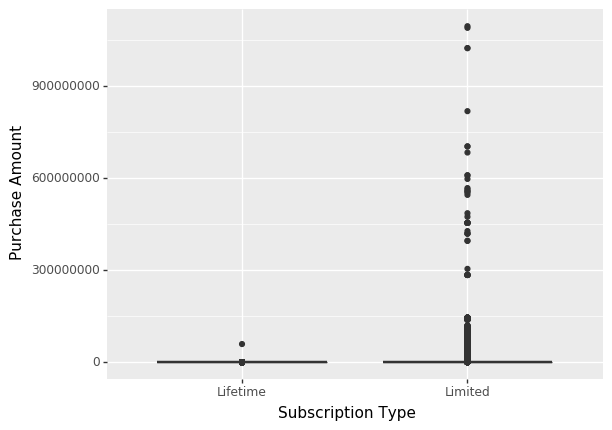

<ggplot: (-9223371873355643540)>

In [99]:
ggplot(subscriber) + geom_boxplot(aes(x = 'Subscription Type' , y = 'Purchase Amount'))

> Very unrealistic purchase amounts appear for mostly Limited subscriptions, dropping those with a purchase amount of above 1,000,000 would be a good idea, chose 1,000,000 just as a starting number to see where the distribution looks like after

In [100]:
subscriber.drop(subscriber.loc[subscriber['Purchase Amount'] >= 1000000].index, inplace=True)
subscriber.describe()

,ID,Purchase Amount,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count
count,38611.000000,25432.000000,27525.000000,27525.000000,27525.000000,27525.000000,27525.000000
mean,20180.489627,71.831456,33.177475,8.467284,2.214242,4.004469,0.372316
std,11550.045465,79.674803,59.164482,37.975546,29.849956,13.336503,1.148135
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,10208.500000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,20266.000000,37.770000,10.000000,1.000000,0.000000,1.000000,0.000000
75%,30214.500000,119.000000,35.000000,6.000000,0.000000,2.000000,0.000000
max,40000.000000,996.030000,4370.000000,4365.000000,4348.000000,196.000000,44.000000


C:\Users\jade5\anaconda3\lib\site-packages\plotnine\layer.py:360: PlotnineWarning: stat_boxplot : Removed 13179 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


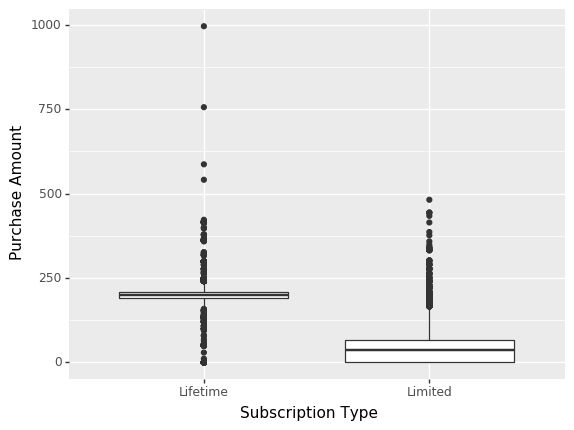

<ggplot: (-9223371873355424832)>

In [101]:
ggplot(subscriber) + geom_boxplot(aes(x = 'Subscription Type' , y = 'Purchase Amount'))

> The distribution is looking much better, still unsure why some purchase amounts are so high given that the most expensive Consumer product on Rosetta Stone is 299

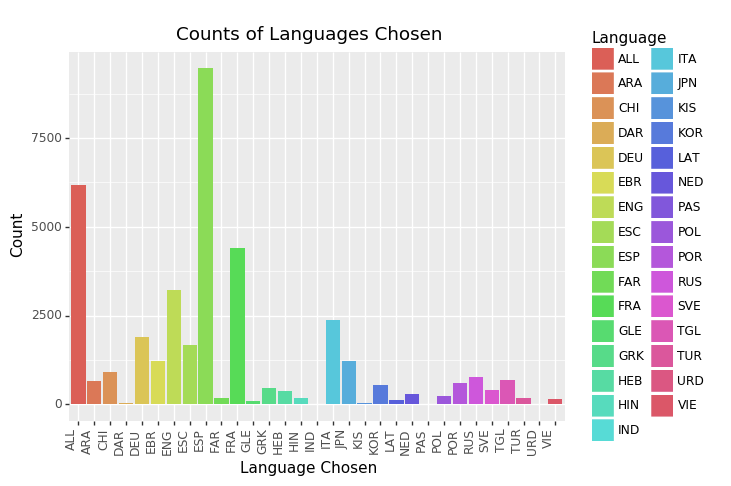

<ggplot: (-9223371873355679452)>

In [105]:
# Comparison of language chosen
ggplot(subscriber, aes(x = 'Language', fill = 'Language')) +  geom_bar() + ylab('Count') + xlab('Language Chosen') +  ggtitle('Counts of Languages Chosen') + theme(axis_text_x=element_text(rotation=90, hjust=1))

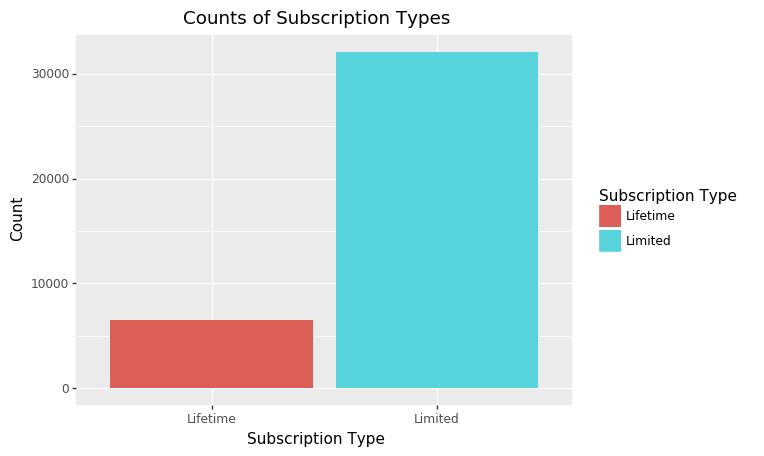

<ggplot: (-9223371873355679444)>

In [106]:
# Type of subscriptions
ggplot(subscriber, aes(x = 'Subscription Type', fill = 'Subscription Type')) + geom_bar() + ylab('Count') + xlab('Subscription Type') + ggtitle('Counts of Subscription Types')